In [3]:
#  Logistische Regression nutzt die Mittel der linearen Regression, allerding verfügt die Zielvariable
#   nur zwei Klassenwert z. B. 0 oder 1
#  Erreicht wird die, indem das y-Ergebnis der Formel z. B. mit > / < 0 bewertet wird.
#  ^y = w[0] * x[0] + w[1] * x[1] + ... + w[p]*x[p]  b > 0

# Steuerung auch hier mit Regularisierungs-Faktor C
# d. h. ein kleines C versucht eine höhere Regularisierung -> die Gewichte (Koeffizienten) werden reduziert
#       ein höheres C unterbindet Regularisierung 

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


In [4]:
# Datensatz laden
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# Trainings-/ Tesdaten erzeugen
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
# Modell erszeugen
logreg = LogisticRegression().fit(X_train, y_train)    # c = 1 / default

# Score anzeigen / berechnen
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

C:\Users\ASCHLAUC\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training set score: 0.955
Test set score: 0.958


In [12]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)    # c = 100

# Score anzeigen / berechnen
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


C:\Users\ASCHLAUC\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)    # c = 0.01 

# Score anzeigen / berechnen
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


C:\Users\ASCHLAUC\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


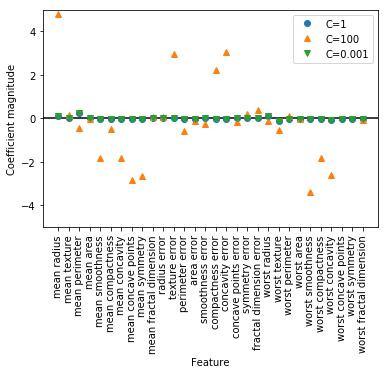

In [14]:

plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()